In [1]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    RocCurveDisplay,
    roc_curve,
    auc,
    ConfusionMatrixDisplay,
    roc_auc_score,
    accuracy_score,
    f1_score,
    matthews_corrcoef,
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

filename = "/home/adralilla/Documents/Thesis/file_lengths.csv"


In [2]:
df = pd.read_csv(filename, index_col=0)
df.columns


Index(['id', 'label', 'length', 'group'], dtype='object')

In [3]:
df.length = df.length.astype("Int64")


In [4]:
df.dtypes


id        object
label     object
length     Int64
group     object
dtype: object

In [5]:
data_group_range = list(df["group"].unique())
data_group_range


['test', 'train', 'validation']

In [6]:
df.groupby(["group", "label"]).length.apply("count")


group       label   
test        Bacteria      691
            Phages       1028
train       Bacteria      167
            Phages      10574
validation  Bacteria       43
            Phages       2643
Name: length, dtype: int64

In [7]:
df.groupby(["group", "label"]).length.apply("mean")


group       label   
test        Bacteria    3950181.162084
            Phages        75535.868677
train       Bacteria    2043017.892216
            Phages         70478.56185
validation  Bacteria    2187538.162791
            Phages        77798.333712
Name: length, dtype: Float64

In [8]:
df.groupby(["group", "label"]).length.apply("min")


group       label   
test        Bacteria    157325
            Phages        1623
train       Bacteria      2078
            Phages        1002
validation  Bacteria      1601
            Phages        1281
Name: length, dtype: Int64

In [9]:
df.groupby(["group", "label"]).length.apply("max")


group       label   
test        Bacteria    11261481
            Phages        490380
train       Bacteria     9342022
            Phages       8212805
validation  Bacteria     7079598
            Phages       4999862
Name: length, dtype: Int64

In [10]:
#train_df = df[df["group"] == "train"]
#roc_auc_score(y_true=train_df.label, y_score=train_df.length)


0.2681299968627149

In [11]:
#test_df = df[df["group"] == "test"]
#roc_auc_score(y_true=test_df.label, y_score=test_df.length)


0.00013655278821085196

In [13]:
train_df


,id,label,length,group
1719,NZ_CP066592.1,Bacteria,187323,train
1720,NZ_CP024824.1,Bacteria,62815,train
1721,NZ_CP016562.1,Bacteria,37697,train
1722,NZ_CP035406.1,Bacteria,4228232,train
1723,NZ_CP041680.1,Bacteria,5330,train
...,...,...,...,...
12455,MH617700.2,Phages,4247,train
12456,NC_009531.1,Phages,46214,train
12457,KY653120.1,Phages,42371,train
12458,JN185608.1,Phages,59749,train


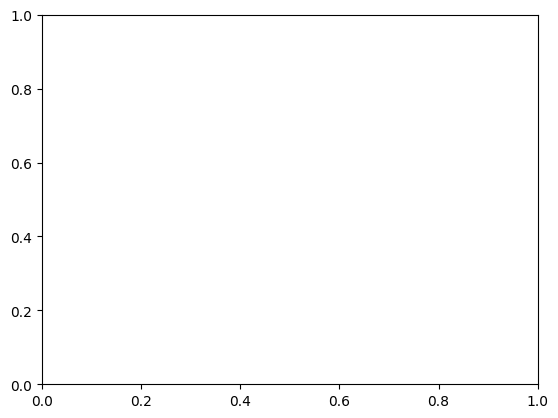

In [12]:
fig, ax = plt.subplots()

In [13]:
sns.kdeplot(
    ax=ax,
    data=train_df[train_df.label == "Phages"][["length"]],
    log_scale=True,
    palette=["blue"],
    label="Phage",
)


<AxesSubplot: ylabel='Density'>

In [14]:
sns.kdeplot(
    ax=ax,
    data=train_df[train_df.label == "Bacteria"][["length"]],
    log_scale=True,
    palette=["red"],
    label="Bacteria",
)


<AxesSubplot: ylabel='Density'>

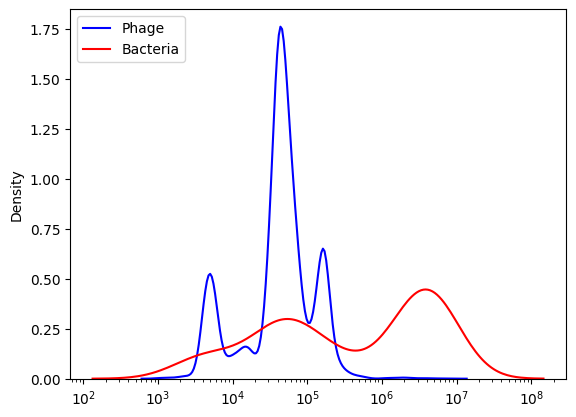

In [15]:
ax.legend( loc="upper left")
fig


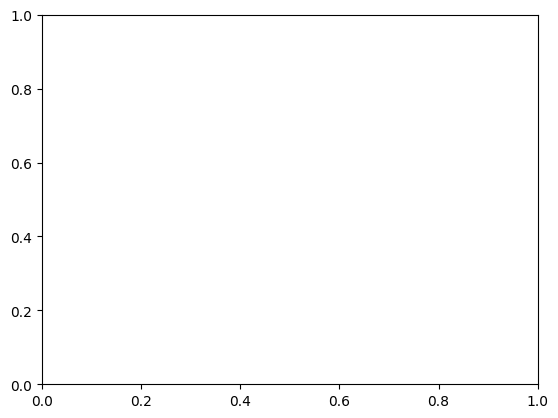

In [24]:
test_df
fig, ax = plt.subplots()


In [25]:
sns.kdeplot(
    ax=ax,
    data=test_df[test_df.label == "Phages"][["length"]],
    log_scale=True,
    palette=["blue"],
    label="Phage",
)


<AxesSubplot: ylabel='Density'>

In [26]:
sns.kdeplot(
    ax=ax,
    data=test_df[test_df.label == "Bacteria"][["length"]],
    log_scale=True,
    palette=["red"],
    label="Bacteria",
)


<AxesSubplot: ylabel='Density'>

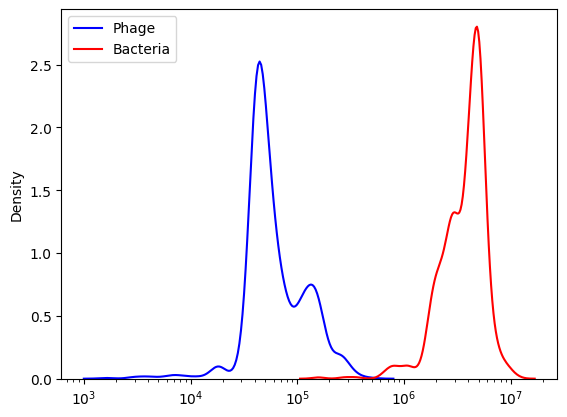

In [27]:
ax.legend(loc="upper left")
fig
